In [133]:
%matplotlib inline

In [134]:
from sklearn import datasets

In [135]:
import matplotlib.pyplot as plt

In [136]:
import numpy as np

In [137]:
def loss_function(model): #Calculate loss function for a cross-entropy model
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    #Forward propagation
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1) #Implementing hyperbolic tangent as our activation function. Also can use sigmoid.
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2) #Predicted output
    probs = exp_scores/ np.sum(exp_scores, axis = 1, keepdims = True)
    #Now calculate loss after predictions
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)
    #Add regularization
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    
    return 1./num_examples * data_loss

In [138]:
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [139]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


In [140]:
#nn_dim --> no. of dimensions
#num_passes --> No. of iterations of BGD
# print_loss --> Print loss value for every 1000th iteration. Default false

def build_model(nn_hdim, num_passes = 20000, print_loss = False):
    #Initialize parameters with random values. Neural Net will learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))
    
    model = {} #Return at the end
    
    #BGD
    
    for i in xrange(0, num_passes):
        
        #Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        #Backward propagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)
        
        # Add regularization. b1 and b2 are biases and hence do not need to be regularize
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1
        
        #Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        #Update model
        
        model = {'W1' : W1, 'b1' : b1, 'W2' : W2, 'b2' : b2}
        
        #Print loss for every 1000 iterations
        
        if print_loss and i%1000 == 0:
            print "Loss after %i iteration: %f" %(i, loss_function(model)) 
            
    return model

In [141]:
np.random.seed(0)

In [142]:
X, y = datasets.make_moons(200, noise = 0.20)

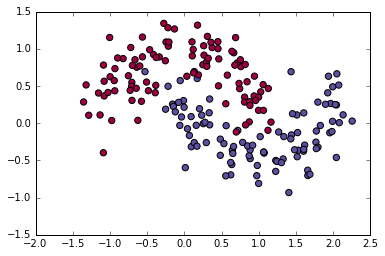

In [143]:
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [144]:
from sklearn.linear_model import LogisticRegression

In [145]:
clf = LogisticRegression()

In [146]:
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

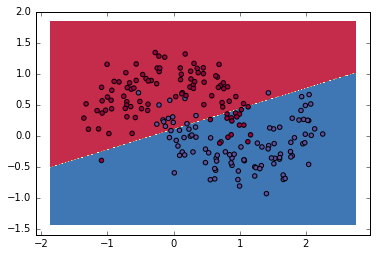

In [147]:
plot_decision_boundary(lambda x: clf.predict(x))

In [148]:
num_examples = len(X) #Training set size

In [149]:
nn_input_dim = 2 #Input layer dimensionality of 2

In [150]:
nn_output_dim = 2 #Output layer dimensionality

In [151]:
epsilon = 0.01 #Learning rate (Changes in other advanced algos like SGD)

In [152]:
reg_lambda = 0.1 #Regularization parameter. Will help us later to solve overfitting

In [153]:
# Now, we will train the neural network with the data we have, and implement batch gradient descent on it
#to find our parameters which minimize our loss function

In [154]:
# Finally, let's build a model with a 1 3-D hidden layer

model = build_model(3, print_loss = True)


Loss after 0 iteration: 0.434476
Loss after 1000 iteration: 0.093658
Loss after 2000 iteration: 0.093620
Loss after 3000 iteration: 0.093618
Loss after 4000 iteration: 0.093617
Loss after 5000 iteration: 0.093617
Loss after 6000 iteration: 0.093617
Loss after 7000 iteration: 0.093617
Loss after 8000 iteration: 0.093617
Loss after 9000 iteration: 0.093617
Loss after 10000 iteration: 0.093617
Loss after 11000 iteration: 0.093617
Loss after 12000 iteration: 0.093617
Loss after 13000 iteration: 0.093617
Loss after 14000 iteration: 0.093617
Loss after 15000 iteration: 0.093617
Loss after 16000 iteration: 0.093617
Loss after 17000 iteration: 0.093617
Loss after 18000 iteration: 0.093617
Loss after 19000 iteration: 0.093617


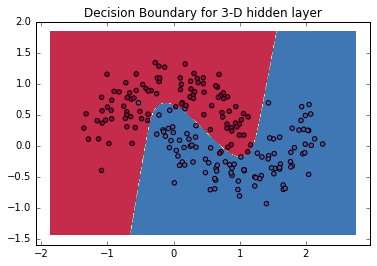

In [155]:
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for 3-D hidden layer")

In [156]:
#Now let's vary hidden layer size and see the outputs

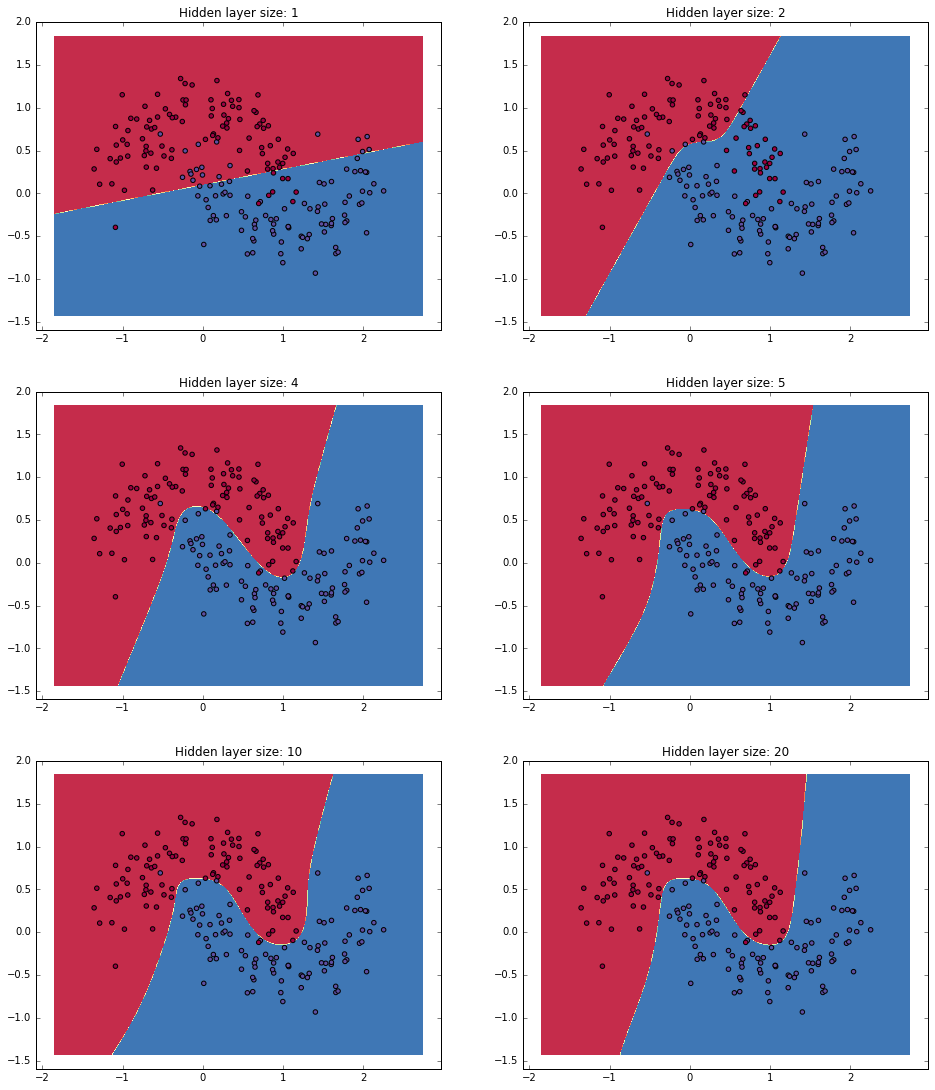

In [157]:
plt.figure(figsize=(16,32))

hidden_dimensions = [1,2,4,5,10,20]

for i, nn_hdim in enumerate(hidden_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title("Hidden layer size: %i" %nn_hdim) 
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

In [158]:
'''
In summary, we used logistic regression on the data set. We didn't get a good response, due to its linear nature. 
Therefore, we shifted to a neural network. We trained the neural network, and plotted a decision boundary to 
judge exactly how many acivation units to be used in the hidden layer. For different layer sizes, we observed 
the plots, and could deduce exactly the range of values which result in overfitting. 
'''

"\nIn summary, we used logistic regression on the data set. We didn't get a good response, due to its linear nature. \nTherefore, we shifted to a neural network. We trained the neural network, and plotted a decision boundary to \njudge exactly how many acivation units to be used in the hidden layer. For different layer sizes, we observed \nthe plots, and could deduce exactly the range of values which result in overfitting. \n"